# Demonstration of the styletrasfer package: 

A Replication for A Neural Algorithm of Artistic Style (Gatys et al. 2015)

Author: Liutong Zhou, Yaqing Wang, Zeyu Ye

In [3]:
import matplotlib.pyplot as plt
from styletransfer.artist import Artist
from styletransfer.io import load_image
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### This is the content image, it can be an arbitrary photograph. We pick our loved one, The Great Wall

image ./data/content/Great_Wall.jpg loaded
None (752, 500) RGB


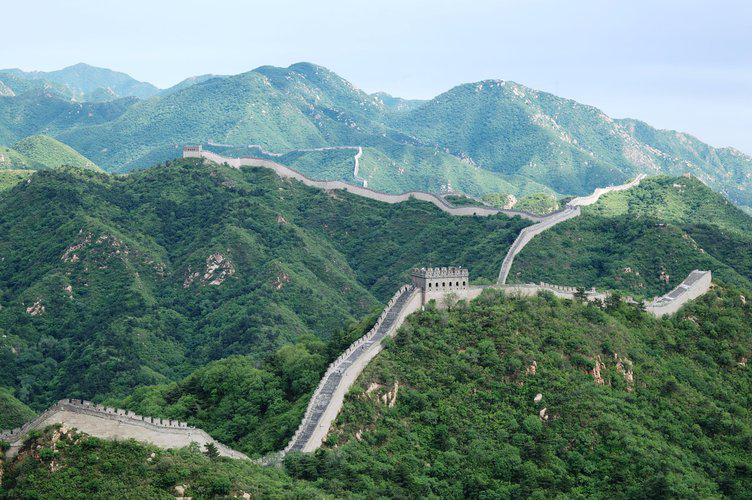

In [4]:
load_image('./data/content/Great_Wall.jpg',verbose=1)

### This is the style artwork, it can be an arbitrary artwork. We pick a traditional Chinese Painting: _Fu Chun Shan Ju Tu_

image ./data/style/fu_chun_shan_ju_tu.jpg loaded
None (1076, 500) RGB


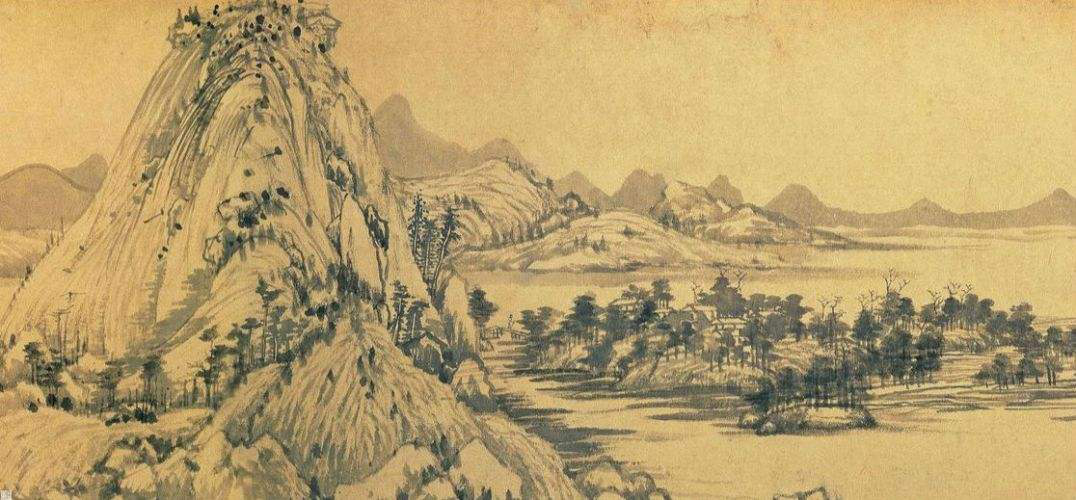

In [5]:
load_image('./data/style/fu_chun_shan_ju_tu.jpg',verbose=1)

### Now We show you how to use our package in three steps
1. Instantiate an Artist
2. Call `fit_transform`, just like what you would do using sklearn
3. Call `draw()`

Done!

Note: if you have no pretrained model weights stored on local drive, the system will automatically download what it needs to ./data directory

In [18]:
artist = Artist(init_type='content',content_weight=20,style_weight=3000)

============================== Fitting ==============================
BUILDING VGG-19 Architecture
loading model weights...
constructing layers...
Layer_Group_1
--conv1_1 | output_shape=(1, 340, 512, 64) | kernel_shape=(3, 3, 3, 64)
--conv1_2 | output_shape=(1, 340, 512, 64) | kernel_shape=(3, 3, 64, 64)
--pool1   | shape=(1, 170, 256, 64)
Layer_Group_2
--conv2_1 | output_shape=(1, 170, 256, 128) | kernel_shape=(3, 3, 64, 128)
--conv2_2 | output_shape=(1, 170, 256, 128) | kernel_shape=(3, 3, 128, 128)
--pool2   | shape=(1, 85, 128, 128)
Layer_Group_3
--conv3_1 | output_shape=(1, 85, 128, 256) | kernel_shape=(3, 3, 128, 256)
--conv3_2 | output_shape=(1, 85, 128, 256) | kernel_shape=(3, 3, 256, 256)
--conv3_3 | output_shape=(1, 85, 128, 256) | kernel_shape=(3, 3, 256, 256)
--conv3_4 | output_shape=(1, 85, 128, 256) | kernel_shape=(3, 3, 256, 256)
--pool3   | shape=(1, 43, 64, 256)
Layer_Group_4
--conv4_1 | output_shape=(1, 43, 64, 512) | kernel_shape=(3, 3, 256, 512)
--conv4_2 | output_s

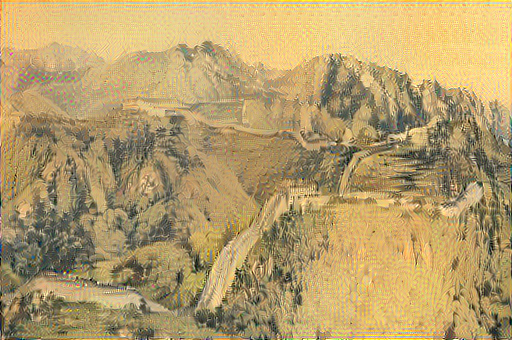

In [19]:
_=artist.fit_transform(content='Great_Wall.jpg',
                     style='fu_chun_shan_ju_tu.jpg',
                     optimizer='l-bfgs',
                     max_iter=4000,
                     verbose=1)
artist.draw('Great_Wall_Fuchunshan')

## There are a lot more options for you to explore, we list a few here

* We provide two optimizers: **Adam and L-BFGS**, chooe one when you init the Artist instance by passing a kwarg


* To tune the visual effects, simply change the **content_weight** and **style_weight**, for example

```python
artist.content_weight = 100
```
   and call `fit_transform again`

* You can use multiple style images and multiple content images at the same time! Just pass  a list of their names to fit_transform like 
```python
artist.fit_transform(content=['Great_Wall.jpg','Columbia_Univ.png'], 
                       style=['Starry_Night.jpg','blah.jpg'])
```

* If you prefer Great_Wall and Starry_Night, you can give then higher weights. For example
```python
artist.style_image_weights =[10,5]
```

* If you read the original paper, and would like to explore using different layers to extract style features and content features, you can pass a list of layer names to the key word argument. For example
```python
artist = Artist(content_layers =['conv4_2'.'conv5_1'],
                content_layer_weights =[1,2],
                style_layers = ['conv1_1','conv2_2','conv3_3','conv4_1'],
                style_layer_weights = [1,2,3,4])               
#actually you don't need to reinistalize the artist, you can directly do the following
artist.content_layers =['conv4_2'.'conv5_1']
#we just show that both ways work
```
and call fit transform

* Last but not least, we provide 3 kind of loss functions that people use in Neural Style Transfer, you can pick what you like
```python
artist.content_loss_function = 3
```

### For detailed usage, check the document! All functions are well documented.

============================== Fitting ==============================
BUILDING VGG-19 Architecture
loading model weights...
constructing layers...
Layer_Group_1
--conv1_1 | output_shape=(1, 340, 512, 64) | kernel_shape=(3, 3, 3, 64)
--conv1_2 | output_shape=(1, 340, 512, 64) | kernel_shape=(3, 3, 64, 64)
--pool1   | shape=(1, 170, 256, 64)
Layer_Group_2
--conv2_1 | output_shape=(1, 170, 256, 128) | kernel_shape=(3, 3, 64, 128)
--conv2_2 | output_shape=(1, 170, 256, 128) | kernel_shape=(3, 3, 128, 128)
--pool2   | shape=(1, 85, 128, 128)
Layer_Group_3
--conv3_1 | output_shape=(1, 85, 128, 256) | kernel_shape=(3, 3, 128, 256)
--conv3_2 | output_shape=(1, 85, 128, 256) | kernel_shape=(3, 3, 256, 256)
--conv3_3 | output_shape=(1, 85, 128, 256) | kernel_shape=(3, 3, 256, 256)
--conv3_4 | output_shape=(1, 85, 128, 256) | kernel_shape=(3, 3, 256, 256)
--pool3   | shape=(1, 43, 64, 256)
Layer_Group_4
--conv4_1 | output_shape=(1, 43, 64, 512) | kernel_shape=(3, 3, 256, 512)
--conv4_2 | output_s

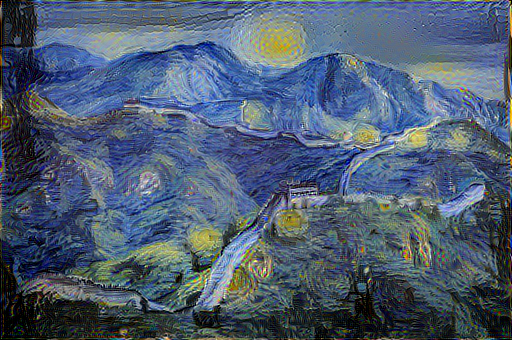

In [20]:
artist= Artist(content_weight=15, 
               style_weights=2000,
               content_layers =['conv3_1','conv4_1'],
              style_layers = ['conv2_2','conv3_3','conv4_4','conv5_4'],
              style_layer_weights = [7,8,9,10],
              content_loss_function=1) 
artist.fit_transform(content='Great_Wall.jpg',
                     style=['StarryNight.jpg'],
                     optimizer='l-bfgs',
                     max_iter=2000,
                     verbose=1)